In [50]:
import numpy as np
import pandas as pd
import seaborn as sns

In [51]:
hic = np.load("./hic_050.npy")

In [52]:
hic.shape

(50, 50)

In [53]:
print(hic)

[[2845.  748.  345. ...   26.   20.   18.]
 [ 748. 2845.  748. ...   19.   21.   17.]
 [ 345.  748. 2845. ...   42.   21.   18.]
 ...
 [  26.   19.   42. ... 1753.  355.  194.]
 [  20.   21.   21. ...  355. 1828.  489.]
 [  18.   17.   18. ...  194.  489. 1676.]]


In [54]:
hic.sum(axis=1)

array([5882., 6610., 7919., 5431., 6953., 6040., 8257., 9245., 8164.,
       9943., 9951., 6943., 4558., 5087., 9060., 5495., 6281., 4736.,
       7527., 7323., 4868., 6007., 5640., 5630., 4452., 5235., 5832.,
       8136., 3815., 5675., 4754., 6202., 5614., 7025., 3118., 4655.,
       7442., 4687., 6951., 6185., 5034., 6498., 6524., 5182., 5830.,
       5328., 5168., 4871., 4430., 3782.])

In [55]:
hic.sum(axis=0)

array([5882., 6610., 7919., 5431., 6953., 6040., 8257., 9245., 8164.,
       9943., 9951., 6943., 4558., 5087., 9060., 5495., 6281., 4736.,
       7527., 7323., 4868., 6007., 5640., 5630., 4452., 5235., 5832.,
       8136., 3815., 5675., 4754., 6202., 5614., 7025., 3118., 4655.,
       7442., 4687., 6951., 6185., 5034., 6498., 6524., 5182., 5830.,
       5328., 5168., 4871., 4430., 3782.])

<Axes: >

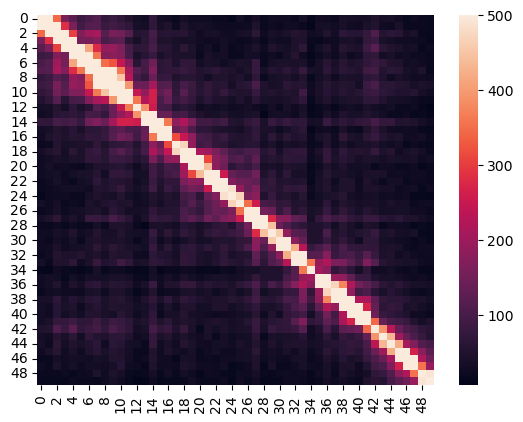

In [56]:
sns.heatmap(hic, vmax=500)

<Axes: >

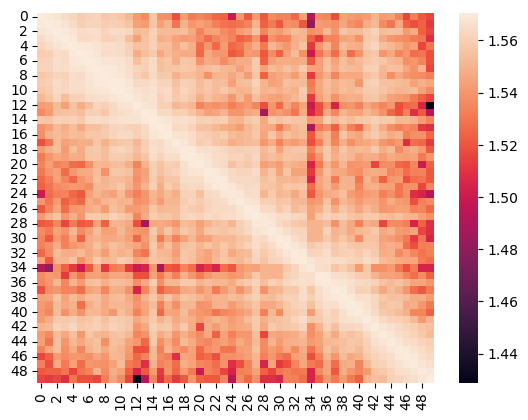

In [57]:
sns.heatmap(np.arctan(hic))

In [58]:
dfV = pd.read_csv("./data/WB_mesh/d10_V.csv")

In [59]:
dfV.shape

(2488, 10)

In [60]:
dfV.head()

,Unnamed: 0,id,x,y,z,i,j,k,degree,to_remove
0,2343,0.0,260.0,357.957167,32.659863,52.0,71.591433,1.088662,3.0,False
1,2383,1.0,240.0,392.598183,32.659863,48.0,78.519637,1.088662,3.0,False
2,2384,2.0,280.0,392.598183,32.659863,56.0,78.519637,1.088662,4.0,False
3,2425,3.0,260.0,427.239199,32.659863,52.0,85.447840,1.088662,2.0,False
4,4229,4.0,260.0,334.863156,65.319726,52.0,66.972631,2.177324,2.0,False


In [61]:
dfV.id.unique().shape

(2488,)

In [62]:
dfE = pd.read_csv("./data/WB_mesh/d10_E.csv")

In [63]:
dfE.shape

(9524, 7)

In [64]:
dfE.head()

,Unnamed: 0,id1,id2,pre_weight,weight,dist,euc_dist
0,0,1.0,0.0,49.006592,0.001670,0.998330,40
1,1,2.0,1.0,605.756902,0.020649,0.979351,40
2,2,2.0,0.0,222.301983,0.007578,0.992422,40
3,3,3.0,2.0,218.537825,0.007449,0.992551,40
4,4,4.0,0.0,870.170414,0.029662,0.970338,40


In [65]:
dfE.id1.unique().shape

(2336,)

In [66]:
dfE.euc_dist.unique().shape

(1,)

In [67]:
# initializing graph G
import networkx as nx

G = nx.Graph()

# getting vertices
dfV = pd.read_csv("./data/WB_mesh/d10_V.csv")

# adding vertices with coordinates
for n, x, y, z in zip(dfV.id, dfV.x, dfV.y, dfV.z):
    G.add_node(n, x = x, y = y, z = z)

# getting edges
dfE = pd.read_csv("./data/WB_mesh/d10_E.csv")
    
# adding edges with distance and weight
for n1, n2, d, w in zip(dfE.id1, dfE.id2, dfE.dist, dfE.weight):
    G.add_edge(n1, n2, dist = d, weight = w)


In [68]:
import random

def proponuj_g(struktura, G):
    """
    struktura = [(x0,y0,z0), ...]
    struktura = [id0, id1, ...]
    G - graf csv, (networkx)
    """
    
    id0 = None
    
    if struktura == None or struktura == []:
        struktura = []
        # choosing start point index (randomly?)
        id1 = random.randint(0, len(G.nodes) - 1)
        
    else:
        # getting an index of the ends of the structure
        i = random.choice([0, len(struktura) - 1])
        id0 = struktura[i]
        # get indexes of connected vertices
        neighbours = list(G[id0].keys())
        # finding new edges
        neighbours = list(set(neighbours).difference(set(struktura)))
        # if there are no other choices, the structure will not changed
        if (neighbours == []):
            # we allow to rollback, when we are stuck
            neighbours = list(G[id0].keys())
            print("No new node has been added.")
            #return struktura
        # taking weights of edges
        weights = []
        for n in neighbours:
            weights.append(G[id0][n]['weight'])
        # choosing the next node index
        id1 = int(random.choices(neighbours, weights=weights, k=1)[0])
        # usuwanie dublujących się krawedzi i testy (może wystarczy)
        # dodatkowo rozbudowywanie struktury (ścieżki) w środku, po wspólnych sąsiadach
        ## PREZENTACJA
        
    struktura.append(id1)
    
    return struktura
   

def podobienstwo_f(struktura, mapa_hic):
    """
    oblicza stopień podobieństwa pomiędzy mapą dystansów a mapa hic
    pearson, 
    """
    
    return podobienstwo
    

def get_structure_coordinates(struktura, G):
    def _add(id0):
        node = G.nodes[id0]
        x = node['x']
        y = node['y']
        z = node['z']
        coordinates.append([x, y, z])
    
    coordinates = []
    for id0 in struktura:
        _add(id0)
        
    return coordinates

    

In [69]:
# tworzenie struktury
struktura = []
for i in range(100):
    struktura = proponuj_g(struktura, G)
print(struktura)
print(len(struktura))
print(get_structure_coordinates(struktura, G))

No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been added.
No new node has been

Tera Czarek

In [70]:
import networkx as nx
import numpy as np
from scipy.spatial import distance_matrix
import math as m
from scipy.stats import pearsonr

In [71]:
hic = np.load("hic_020.npy")


def distance_map(structure):
    # returns distance map of given structure
    map_ = distance_matrix(structure, structure)
    return map_

In [72]:
def calc_midpoint(point1, point2):
    return [(point1[0] + point2[0])/2, (point1[1] + point2[1])/2, (point1[2] + point2[2])/2]

In [73]:
def add_points_to_structure(structure, dim):
    '''
    adds points to the structure so it hase same dimension as dim (hic matrix)
    '''
    n = len(structure)
    new_structure = []
    nr_points = dim - n
    if nr_points > 0:
        for i in range(nr_points):
            nr_used = len(new_structure) - i
            new_structure.append(structure[nr_used : nr_used + m.floor((i+1)*n/nr_points)])
            new_structure.append(calc_midpoint(structure[nr_used + m.floor((i+1)*n/nr_points - 1)], structure[nr_used + m.floor((i+1)*n/nr_points)]))
        new_structure.append(structure[len(new_structure) - nr_points + 1 :])
        # trochę sus, bo dodajemy na końcu, midpoints między wybranymi punktami
        return new_structure
    elif nr_points == 0:
        return structure
    else:
        return structure[:dim] #todo lepiej
        # nie ucinać ostatnich

In [74]:
    
def reverse_matr(matr):
    m = np.asarray(matr)
    return m/(m*m)    

In [75]:
    
def calc_corr(matr1, matr2):
    corr, _ = pearsonr(matr1.flatten(), matr2.flatten())
    return corr

In [76]:
def f_similarity(structure, hic):
    dim = len(hic)
    structure = add_points_to_structure(structure, dim)
    dist_map = distance_map(structure)
    reversed_hic = reverse_matr(hic)
    return calc_corr(reversed_hic, dist_map)
    
structure = [[1, i+1, i*2] for i in range(20)]
f_similarity(structure, hic)

0.8770778941727371

In [77]:
structure

[[1, 1, 0],
 [1, 2, 2],
 [1, 3, 4],
 [1, 4, 6],
 [1, 5, 8],
 [1, 6, 10],
 [1, 7, 12],
 [1, 8, 14],
 [1, 9, 16],
 [1, 10, 18],
 [1, 11, 20],
 [1, 12, 22],
 [1, 13, 24],
 [1, 14, 26],
 [1, 15, 28],
 [1, 16, 30],
 [1, 17, 32],
 [1, 18, 34],
 [1, 19, 36],
 [1, 20, 38]]

# simulated annealing
zmniejszanie temperatury, w celu znalezienia max globalnego
zależy od możliwości ruchu w g
na początek infalcja - rozszerzanie struktury

Zaczynamy od temperatury T0 i jakiejś struktury.
Nowa struktura z g na podstawie f i aktualnej temperatury.
Zazwyczaj min(exp(-fx-fy/T), 1), liczymy różnice w podobieństwie dla dwóch struktur x i y
wybieramy kolejne punkty na podstawie tego i rozbudowujemy jedną ścieżkę


# MCMC

próbkowanie Gibbsa - najprostsze, ale tego się nie używa w tym projekcie
losowanie xs w celu zamodelowania wielowymiarowej gęstości

algorytm Metropolisa-Hastingsa - to mamy zrobić (zalecenie prowadzącego)
losuje ścieżki, w całości
dostajemy zbiór wielu ścieżek
wybieramy najlepsze, albo coś z nich łączymy

losujemy nową strukturę, którą akceptujemy lub nie

wzorki są na slajdach (najprościej min(fy/fx, 1) dla symetrycznych gęstości - możemy to założyć)
albo liczymy prawdopodobieństwa wylosowania kolejnych struktur, można zwracać p-stwa w funkcji g utworzenia danej ścieżki, wystarczy wtedy wymnażać sobie wagi, może jakoś przeskalować, ale można też pominąć i się nie męczyć (prowadzący nie będzie się czepiał)

f liczymy z funkcji podobieństwa

w symulacjach, jak mamy wykresik, odcinamy początek, bo jest zawsze skorelowany
można odpalić mcmc kilka razy


po sym. wyrza... otrzymujemy jedną strukturę
po mcmc otrzymujemy całą próbkę, wiele struktur
z nich wybieramy pewnie najlepszą

ale można też zaszaleć

w wynikach mają być wykresy podobieństwa f względem ilości iteracji

ale można szaleć

krótka prezentacja 5 - 10 slajdów